# SCS2013 Exercise 11 (2022 Fall)

**This exercise notebook will go through the understanding of "Object-Oriented Programming (OOP) - Inheritance" and some "Modules"**

- Class Inheritance
- Method Overriding
- Import Modules



## Inheritance

The Object-Oriented Programming (OOP) is based on the concept of *objects*, which can contain data and code: data in the form of instance variables (or known as attributes or properties), and code in the form of methods. 

```
class <ParentClass>:
  <Body of parent class>

class <ChildClass>(<ParentClass>):
  <body of child class>
```

Implement a parent class `Employee` that handles the common information for every employee type:

- Instance variables
  - `id`: identity number of an employee
  - `name`: name of an employee

- Instance methods
  - `print_info()`: prints out Employee ID and NAME 

`Employee` is the parent class for all employee types. 

In [12]:
class Employee:
  # constructore
  def __init__(self, id, name):
    self.id = id
    self.name = name
  
  def print_info(self):
    print(f'Employee: ID {self.id}, NAME {self.name}')

Now, create two child classes `SalaryEmployee` and `HourlyEmployee`. Both classes inherit the attributes and methods from the `Employee` class. 

`SalaryEmployee` class:
* Instance variables
  - add constructor to add its own instance variables `salary`
  - otherwise, it inherits `Employee`'s constructor

* Instance methods
  - `cal_payroll()`: return the employee's salary

`HourlyEmployee` class:
* Instance variables
  - add constructor to add its own instance variables `work_hours` and `hour_rate`
  - otherwise, it inherits `Employee`'s constructor

* Instance methods
  - `cal_payroll()`: return the employee's salary (`work_hours` $\times$ `hour_rate`)

**Method Overriding**

What if we add a method in the child class with the *same* name as a function in the parent class?
The method in the child class **overrides** that in the parent class

- For example, `__init__()` was defined in both classes, `Employee` and `SalaryEmployee`
- `__init__()` in `SalaryEmployee` gets preference over the `__init__()` in `Employee`

In [13]:
class SalaryEmployee(Employee):
  # constructor
  def __init__(self, id, name, salary):
    super().__init__(id, name)
    self.salary = salary

  def cal_payroll(self):
    return self.salary

In [14]:
class HourlyEmployee(Employee):
  # constructor
  def __init__(self, id, name, work_hours, hour_rate):
    # Employee.__init__(self, id, name)
    super().__init__(id, name)
    self.work_hours = work_hours
    self.hour_rate = hour_rate

  def cal_payroll(self):
    return self.hour_rate * self.work_hours

Now, create another child class `IncentiveEmployee` that inherits from the `SalaryEmployee` class.

`IncentiveEmployee` class:
* Instance variables
  - add constructor to add its own instance variables `incentive`
  - otherwise, it inherits `SalaryEmployee`'s constructor

* Instance methods
  - `cal_payroll()`: return the employee's salary (salary as a `SalaryEmployee` with additional `incentive`)

In [15]:
class IncentiveEmployee(SalaryEmployee):
  # constructor
  def __init__(self, id, name, salary, incentive):
    super().__init__(id, name, salary)
    self.incentive = incentive

  def cal_payroll(self):
    # base_salary = SalaryEmployee.cal_payroll(self)
    base_salary = super().cal_payroll()
    return base_salary + self.incentive

Create a class `PayrollSystem` that handles payroll of all employees:

- no constructor required at this time
- Instance methods
  - `cal_payroll()`: takes a list of employees as argument, and print out i) information of each employee (by using `print_info()`) and ii) payroll amount (by using `cal_payroll()`) 

In [16]:
class PayrollSystem:
  def cal_payroll(self, employees): # employees: employee 객체들의 리스트
    print('===============')
    print('Payroll System')
    print('===============')
    for employee in employees:
      employee.print_info()
      print(f'Payroll amount: {employee.cal_payroll()}')
      print('***************')

Now, make a number of employee objects and manage payroll system!

In [17]:
# 각 객체들
salary_E1 = SalaryEmployee(1, 'James', 2000) 
salary_E2 = SalaryEmployee(1, 'Alice', 2500)
hour_E1 = HourlyEmployee(2, 'Emma', 30, 25)
incentive_E1 = IncentiveEmployee(3, 'Tyler', 1500, 300)

payroll_system = PayrollSystem()
payroll_system.cal_payroll([salary_E1, salary_E2, hour_E1, incentive_E1])


Payroll System
Employee: ID 1, NAME James
Payroll amount: 2000
***************
Employee: ID 1, NAME Alice
Payroll amount: 2500
***************
Employee: ID 2, NAME Emma
Payroll amount: 750
***************
Employee: ID 3, NAME Tyler
Payroll amount: 1800
***************


**Multiple Inheritance**

Python supports *multiple inheritance* that is an ability to derive a class from multiple parent classes at the same time. 

```
class <Parent1>:
  <body of Parent1 class>

class <Parent2>:
  <body of Parent2 class>

class <Child>(<Parent1>, <Parent2>):
  <body of Child class>
```

In [18]:
class Person:
  def __init__(self, name=''):
    self.name = name

  def print_name(self):
    print(f'Name: {self.name}')

class Coder:
  def __init__(self, num_skills=0):
    self.num_skills = num_skills

  def print_skills(self):
    print(f'Number of skills: {self.num_skills}')

class PythonStudent(Person, Coder):
  def __init__(self, name, num_skills, version):
    Person.__init__(self, name)
    Coder.__init__(self, num_skills)
    self.version = version

  def print_all(self):
    super().print_name()
    super().print_skills()
    print(f'Python version: {self.version}')

In [19]:
ps = PythonStudent('Alice', 2, 3.7)
ps.print_all()

Name: Alice
Number of skills: 2
Python version: 3.7


In [20]:
ps.__dict__

{'name': 'Alice', 'num_skills': 2, 'version': 3.7}

## Modules


**Modules**

A Python module is a file containing Python code (statements, definitions, functions, ...) 

A module has a name specified by the filename without the `.py` extension: `<module_name>.py` has a module name `module_name`.

In [21]:
# mymodule.py 

def greeting(name):
  print(f'Hello! {name}!!')

def welcome(course):
  print(f'Welcome to {course}!!')

person1 = {
    'name': 'John', 
    'age': 36, 
    'country': 'Korea'
    }

Now we can use the module by using the `import` statement.

In [22]:
import mymodule

mymodule.greeting('John')
mymodule.welcome('SCS2013')

a = mymodule.person1['age']
print(a)

Hello! John!!
Welcome to SCS2013!!
36


In [23]:
# pricing.py

def get_net_price(price, tax_rate, discount=0):
  return price * (1+tax_rate) * (1-discount)

def get_tax(price, tax_rate=0):
  return price * tax_rate

person1 = {
    'name': 'John', 
    'age': 36, 
    'country': 'Korea'
    }

**How to import?**

```
import <module_name>

<module_name>.<function_name>

import <module_name> as <new_name>

from <module_name> import <function_name>

from <module_name> import <function_name> as <new_name>

from <module_name> import *
```

In [24]:
import pricing

net_price = pricing.get_net_price(price=100, tax_rate=0.01)
print(net_price)

101.0


In [25]:
p1 = pricing.person1
print(f"Name: {p1['name']}, Age: {p1['age']}")

Name: John, Age: 36


In [26]:
import pricing as pr

net_price = pr.get_net_price(price=100, tax_rate=0.01)
print(net_price)

101.0


In [27]:
from pricing import get_net_price # 특정 함수만 import

net_price = get_net_price(price=100, tax_rate=0.01)
print(net_price)

101.0


In [28]:
from pricing import get_net_price as net_pr 

net_price = net_pr(price=100, tax_rate=0.01)
print(net_price)

101.0


In [29]:
from pricing import *

net_price = get_net_price(price=100, tax_rate=0.01)
tax = get_tax(price=100, tax_rate=0.01)
print(net_price)
print(tax)
print(person1)

101.0
1.0
{'name': 'John', 'age': 36, 'country': 'Korea'}


## Exercise for Inheritance


### E-1

Create a `Vehicle` class with 

* instance variables
  - `name`, `max_speed` and `mileage`

* instance methods
  - `print_vehicle()`: prints out its `name`, `max_speed` and `mileage` information
  - `charge()`: return a mileage charge, which is set to **mileage $\times$ 10**. 

Expected result
```
v1 = Vehicle('Volvo', 150, 1000)
v1.print_vehicle()
print(f'{v1.name} charge is {v1.charge()}')
>> 
Name: Volvo, Max-speed: 150 and Mileage: 1000
Volvo charge is 10000
```

In [30]:
# your code here:
# Vehicle class
class Vehicle:
    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

    def print_vehicle(self):
        print(f'Name: {self.name}, Max_speed: {self.max_speed} and Mileage: {self.mileage}')

    def charge(self):
        self.charge = self.mileage * 10
        return self.charge

    

In [31]:
# test your code:
v1 = Vehicle('Volvo', 150, 1000)
v1.print_vehicle()
print(f'{v1.name} charge is {v1.charge()}')

Name: Volvo, Max_speed: 150 and Mileage: 1000
Volvo charge is 10000


### E-2

Create a child class called `Bus` that will inherit all of the attributes and methods of the `Vehicle` class. It has additional variables and methods:

- instance variables
  - additional instance variable is `seat_capacity` (좌석수)
  - otherwise, it inherits `Vehicle`'s constructor

- instance methods
  - `print_vehicle()`: it additionally prints out its `seat_capacity` information
  - `charge()`: it needs an extra charge for maintenance that is **seat capacity $\times$ 5**. Therefore, total charge for a bus is **final amount = mileage charge + maintenance charge**. You need to override the `charge()` method of a `Vehicle` class in `Bus` class.

Expected result 
```
b1 = Bus('SchoolBus', 120, 500, 50)
b1.print_vehicle()
print(f'{b1.name} charge is {b1.charge()}')
>>
Name: SchoolBus, Max-speed: 120 and Mileage: 500
The seating capacity of SchoolBus is 50 passengers
SchoolBus charge is 5250
```

In [32]:
# your code here: 
# Bus class
class Bus(Vehicle):
    def __init__(self, name, max_speed, mileage, seat_capacity):
        super().__init__(name, max_speed, mileage)
        self.seat_capacity = seat_capacity

    def print_vehicle(self):
        super().print_vehicle()
        #print(f'Name: {self.name}, Max_speed: {self.max_speed} and Mileage: {self.mileage}')
        print(f'The seating capacity of {self.name} is {self.seat_capacity} passengers')

    def charge(self):
        mileage_charge = super().charge()
        total_charge = mileage_charge + self.seat_capacity * 5
        return total_charge

In [33]:
# test your code:
b1 = Bus('SchoolBus', 120, 500, 50)
b1.print_vehicle()
print(f'{b1.name} charge is {b1.charge()}')

Name: SchoolBus, Max_speed: 120 and Mileage: 500
The seating capacity of SchoolBus is 50 passengers
SchoolBus charge is 5250


In [34]:
print(type(v1))
print(type(b1))

print(f'v1 is instance of Vehicle? {isinstance(v1, Vehicle)}')
print(f'b1 is instance of Vehicle? {isinstance(b1, Vehicle)}')
print(f'v1 is instance of Bus? {isinstance(v1, Bus)}')
print(f'b1 is instance of Bus? {isinstance(b1, Bus)}')

<class '__main__.Vehicle'>
<class '__main__.Bus'>
v1 is instance of Vehicle? True
b1 is instance of Vehicle? True
v1 is instance of Bus? False
b1 is instance of Bus? True


### E-3

Create a class named `Triangle`
- instance variables: two values `base`(밑변) and `height`(높이)
- instance method: `tri_area()` that computes the area of a triangle: **triangle area = 0.5 $\times$ base $\times$ height**

Create a class named `Rectangle` 

- instance variables: two values `length`(가로) and `width`(세로)
- instance method: `area()` that computes the area of a rectangle: **rectangle area = length $\times$ width**

Expected result
```
T1 = Triangle(5, 20)
print(f'Triangle: base {T1.base}, height {T1.height}: area {T1.tri_area()}')

R1 = Rectangle(5, 20)
print(f'Rectangle: length {R1.length}, width {R1.width}: area {R1.area()}')
>>
Triangle: base 5, height 20: area 50.0
Rectangle: length 5, width 20: area 100
```

In [35]:
# your code here: 
# Triangle class
class Triangle:
    def __init__(self, base, height):
        self.base = base
        self.height = height

    def tri_area(self):
        return 0.5 * self.base * self.height
    

In [36]:
# Rectangle class
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width



In [37]:
# test your code:
T1 = Triangle(5, 20)
print(f'Triangle: base {T1.base}, height {T1.height}: area {T1.tri_area()}')

R1 = Rectangle(5, 20)
print(f'Rectangle: length {R1.length}, width {R1.width}: area {R1.area()}')

Triangle: base 5, height 20: area 50.0
Rectangle: length 5, width 20: area 100


### E-4

Create a child class named `Square` 
- instance variables: it has only a single side length `side`
- note that a square is a special type of a rectangle - one whose length and width are equal as `side`
- `Square` will inherit all of the attributes of `Rectangle`

Expected result
```
S1 = Square(5)
print(f'Square: side {S1.side}: area {S1.area()}')
>>
Square: side 5: area 25
```


In [55]:
# your code here:
# Square class
def Square(Rectangle):
    def __init__(self, side):
        self.side = side
    
        Rectangle.__init__(self, side, side)

In [56]:
# test your code:
S1 = Square(5)
#print(f'Square: side {S1.side}: area {S1.area()}')
print(S1.area())

AttributeError: ignored

### E-5

Create a child class named `Pyramid` 
- instance variables: a `base` and `slant_height` 
- a Pyramid is a combination of one square and four triangles 
- `Pyramid` inherits all of the attributes of `Square` and `Triangle`
- Total surface area is **pyramid area = square area (base) + 4 $\times$ triangle area**

Expected result
```
P1 = Pyramid(5, 20)
print(f'Pyramid: base {P1.base}, slant height {P1.slant_height}: area {P1.area()}')
>>
Pyramid: base 5, slant height 20: area 225.0
```

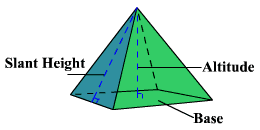

In [ ]:
# your code here: 
# Pyramid class

class Pyramid(Square, Triangle):
    def __init__(self, base, slant_height):
        Square.__init__(self, base)
        Triangle.__init__(self, slant_height)
        self.base = base
        self.slant_height = slant_height

    def area(self):
        # square_area = Square.area(self)
        square_area = super().area()
        # tri_area = Triangle.tri_area(self)
        tri_area = super().tri_area()
        return square_area + 4 * tri_area


In [ ]:
# test your code:
P1 = Pyramid(5, 20)
print(f'Pyramid: base {P1.base}, slant height {P1.slant_height}: area {P1.area()}')